In [1]:
# load iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
# convert to pandas dataframe
import pandas as pd
data = pd.DataFrame(data, columns=iris.feature_names)
# add target column
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# merge two species into one
data['species'] = data['species'].replace({2:1})
data['species'].value_counts()

species
1    100
0     50
Name: count, dtype: int64

In [3]:
import os
os.chdir('..')

In [4]:
from src.bn_forest_sampler import BayesianNetworkModel

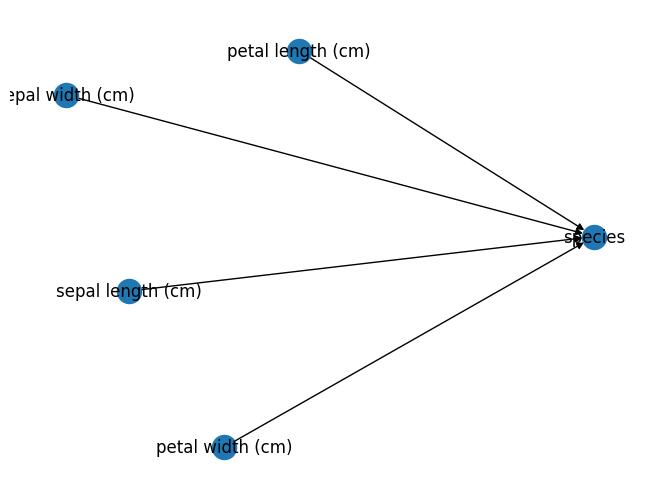

In [5]:
import networkx as nx
from src.temporal_order_dag import temporal_order_dag
# add nodes
measurement_cols = [col for col in data.columns if col != 'species']
outcome = ['species']
temporal_ordering = [measurement_cols, outcome]
causal_DAG = temporal_order_dag(temporal_ordering)
nx.draw(causal_DAG, with_labels=True)

In [6]:
# generate causal synthetic data
model = BayesianNetworkModel(data=data, 
                             causal_dag=causal_DAG,
                             n_samples=data.shape[0])
synth_data = model.get_causal_synthetic_data()

In [7]:
synth_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.3,3.2,4.0,0.3,1
1,6.1,3.0,1.4,0.3,0
2,6.3,3.2,5.9,1.0,1
3,5.7,2.8,1.3,2.1,0
4,6.0,3.1,4.9,1.4,1
